In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import astropy.units as u # I use astropy units in everything, very helpful for bookkeeping/debugging

from lim import lim # The base intensity mapping object
from datetime import datetime

matplotlib.rcParams.update({'font.size': 18,'figure.figsize':[8,7]}) # Make figures better
#matplotlib.rcParams,update({}'figure.figsize'] = [8,7]
from scipy.ndimage import gaussian_filter
plt.rcParams["mathtext.fontset"] = "dejavuserif"

lc_paths = '/home/dongwooc/scratchspace/pprun_hiz_npz/'
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(lc_paths) if isfile(join(lc_paths, f))]
onlyfiles.remove('pksc2npz_5313591.out')
onlyfiles.remove('pksc2npz.sh')
for i in range(len(onlyfiles)):
    onlyfiles[i] = lc_paths+onlyfiles[i]
    
# Initialize LineModel with default model
m = lim()
m_cii = lim('Lichen_v4', doSim = True)

Input cosmological model does not match simulations
Setting analytic cosmology to match simulation


In [2]:
m_cii.update(model_par = {'zdex': 0.4,
 'M0': 1900000000.0,
 'Mmin': 20000000000,
 'alpha_MH1': 0.74,
 'alpha_LCII': 0.024,
 'alpha0': -1.412,
 'gamma0': 0.31,
 'BehrooziFile': 'sfr_reinterp.dat'},
            dnu = 2.8*u.GHz,
            nuObs = 270*u.GHz,
            Delta_nu = 40*u.GHz,
            tobs = np.inf*u.h,
            Omega_field = 4*u.deg**2,
            catalogue_file = '/home/dongwooc/scratchspace/pprun_hiz_npz/COMAP_z5.8-7.9_960Mpc_seed_13819.npz')

Loading signal:

In [4]:
# The domain of histograms for signal:
# binning = np.logspace(1, 5, 50)
# center = (binning[:-1] + binning[1:]) / 2

In [10]:
avg_zdex03_sig = np.load('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/sig/n_avg_zdex0-3.npy')
avg_zdex04_sig = np.load('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/sig/n_avg_basis.npy')
avg_zdex05_sig = np.load('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/sig/n_avg_zdex0-5.npy')

avg_a20_sig = np.load('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/sig/n_avg_acii0-020.npy')
avg_a24_sig = avg_zdex04_sig
avg_a28_sig = np.load('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/sig/n_avg_acii0-028.npy')

avg_mhi68_sig = np.load('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/sig/n_avg_mhi0-68.npy')
avg_mhi74_sig = avg_zdex04_sig
avg_mhi80_sig = np.load('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/sig/n_avg_mhi0-80.npy')

avg_min99_sig = np.load('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/sig/n_avg_logmmin9-9.npy')
avg_min10_sig = avg_zdex04_sig
avg_min01_sig = np.load('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/sig/n_avg_logmmin10-1.npy')


avg_a013_sig = np.load('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/sig/n_avg_a0_-1-312.npy')
avg_a014_sig = avg_zdex04_sig
avg_a015_sig = np.load('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/sig/n_avg_a0_-1-512.npy')


avg_g27_sig = np.load('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/sig/n_avg_g0_0-27.npy')
avg_g31_sig = avg_zdex04_sig
avg_g35_sig = np.load('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/sig/n_avg_g0_0-35.npy')

log_center = np.load('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/sig/log_center.npy')

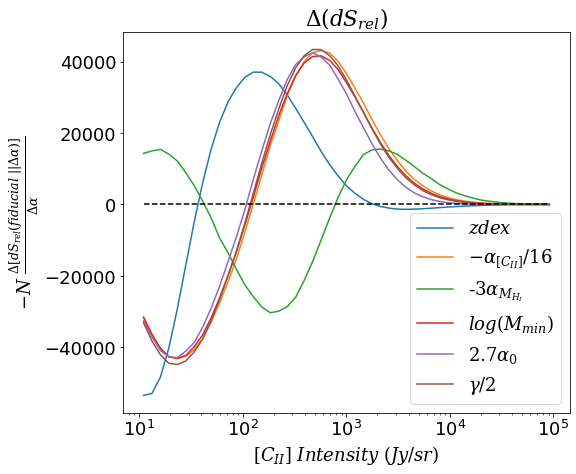

In [14]:
plt.plot(log_center, -avg_zdex04_sig*(np.log(avg_zdex05_sig/avg_zdex04_sig) - np.log(avg_zdex03_sig/avg_zdex04_sig))/0.2, label = r'$zdex$')
plt.plot(log_center, (1/16)*avg_a24_sig*(np.log(avg_a28_sig/avg_a24_sig) - np.log(avg_a20_sig/avg_a24_sig))/(0.008), label = r'$-\alpha_{[C_{II}]}/16$')
plt.plot(log_center, 3*avg_mhi74_sig*(np.log(avg_mhi80_sig/avg_mhi74_sig) - np.log(avg_mhi68_sig/avg_mhi74_sig))/0.12, label = r'-$3\alpha_{M_{H_I}}$')
plt.plot(log_center, -avg_min10_sig*(np.log(avg_min01_sig/avg_min10_sig) - np.log(avg_min99_sig/avg_min10_sig))/((10.1) - 9.9), label = r'$log(M_{min})$')
plt.plot(log_center, -2.7*avg_a014_sig*(np.log(avg_a015_sig/avg_a014_sig) - np.log(avg_a013_sig/avg_a014_sig))/0.2, label = r'$2.7\alpha_0$')
plt.plot(log_center, -0.5*avg_g31_sig*(np.log(avg_g35_sig/avg_g31_sig) - np.log(avg_g27_sig/avg_g31_sig))/0.08, label = r'$\gamma/2$')


plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$-N\ \frac{\Delta [dS_{rel}(fiducial\ \vert \vert \Delta \alpha)]}{\Delta \alpha}$')
plt.title(r'$\Delta(dS_{rel})$')
plt.xscale('log')
#plt.yscale('log')
plt.hlines(y = 0, xmin = log_center[0], xmax = log_center[-1], linestyle = '--', color = 'k')
plt.legend()

#plt.savefig('paper_figs/dsrel/drel_sig_v2.png', bbox_inches = 'tight')

Loading Beamed signal

1/2 pixel:

1 pixel:

In [24]:
avg_zdex03_pix1 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/beam/pix_1/n_avg_zdex0-3.npy')
avg_zdex04_pix1 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/beam/pix_1/n_avg_basis.npy')
avg_zdex05_pix1 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/beam/pix_1/n_avg_zdex0-5.npy')

avg_a20_pix1 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/beam/pix_1/n_avg_acii0-020.npy')
avg_a24_pix1 = avg_zdex04_pix1
avg_a28_pix1 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/beam/pix_1/n_avg_acii0-028.npy')

avg_mhi68_pix1 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/beam/pix_1/n_avg_mhi0-68.npy')
avg_mhi74_pix1 = avg_zdex04_pix1
avg_mhi80_pix1 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/beam/pix_1/n_avg_mhi0-80.npy')

avg_min99_pix1 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/beam/pix_1/n_avg_logmmin9-9.npy')
avg_min10_pix1 = avg_zdex04_pix1
avg_min01_pix1 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/beam/pix_1/n_avg_logmmin10-1.npy')


avg_a013_pix1 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/beam/pix_1/n_avg_a0_-1-312.npy')
avg_a014_pix1 = avg_zdex04_pix1
avg_a015_pix1 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/beam/pix_1/n_avg_a0_-1-512.npy')


avg_g27_pix1 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/beam/pix_1/n_avg_g0_0-27.npy')
avg_g31_pix1 = avg_zdex04_pix1
avg_g35_pix1 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/beam/pix_1/n_avg_g0_0-35.npy')

beam_center = np.load('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/beam/pix_1/beam_center.npy')

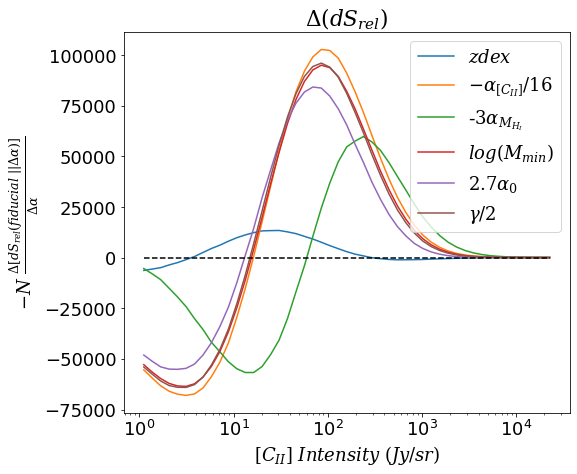

In [25]:
plt.plot(beam_center, -avg_zdex04_pix1*(np.log(avg_zdex05_pix1/avg_zdex04_pix1) - np.log(avg_zdex03_pix1/avg_zdex04_pix1))/0.2, label = r'$zdex$')
plt.plot(beam_center, (1/16)*avg_a24_pix1*(np.log(avg_a28_pix1/avg_a24_pix1) - np.log(avg_a20_pix1/avg_a24_pix1))/(0.008), label = r'$-\alpha_{[C_{II}]}/16$')
plt.plot(beam_center, 3*avg_mhi74_pix1*(np.log(avg_mhi80_pix1/avg_mhi74_pix1) - np.log(avg_mhi68_pix1/avg_mhi74_pix1))/0.12, label = r'-$3\alpha_{M_{H_I}}$')
plt.plot(beam_center, -avg_min10_pix1*(np.log(avg_min01_pix1/avg_min10_pix1) - np.log(avg_min99_pix1/avg_min10_pix1))/((10.1) - 9.9), label = r'$log(M_{min})$')
plt.plot(beam_center, -2.7*avg_a014_pix1*(np.log(avg_a015_pix1/avg_a014_pix1) - np.log(avg_a013_pix1/avg_a014_pix1))/0.2, label = r'$2.7\alpha_0$')
plt.plot(beam_center, -0.5*avg_g31_pix1*(np.log(avg_g35_pix1/avg_g31_pix1) - np.log(avg_g27_pix1/avg_g31_pix1))/0.08, label = r'$\gamma/2$')


plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$-N\ \frac{\Delta [dS_{rel}(fiducial\ \vert \vert \Delta \alpha)]}{\Delta \alpha}$')
plt.title(r'$\Delta(dS_{rel})$')
plt.xscale('log')
#plt.yscale('log')
plt.hlines(y = 0, xmin = beam_center[0], xmax = beam_center[-1], linestyle = '--', color = 'k')
plt.legend()

#plt.savefig('paper_figs/dsrel/drel_sig_v2.png', bbox_inches = 'tight')

3/2 pixel:

2 pixels:

4 pixels:

Loadig forecast

40000h:

In [12]:
# The domain of histograms for forecast:
# lin_binning = np.linspace(-4*10**(4), 4*10**(4), 80)
# lin_center = (lin_binning[:-1] + lin_binning[1:]) / 2

In [13]:
avg_zdex03_for = np.load('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/for/n_avg_zdex0-3.npy')
avg_zdex04_for = np.load('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/for/n_avg_basis.npy')
avg_zdex05_for = np.load('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/for/n_avg_zdex0-5.npy')

avg_a20_for = np.load('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/for/n_avg_acii0-020.npy')
avg_a24_for = avg_zdex04_for
avg_a28_for = np.load('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/for/n_avg_acii0-028.npy')

avg_mhi68_for = np.load('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/for/n_avg_mhi0-68.npy')
avg_mhi74_for = avg_zdex04_for
avg_mhi80_for = np.load('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/for/n_avg_mhi0-80.npy')

avg_min99_for = np.load('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/for/n_avg_logmmin9-9.npy')
avg_min10_for = avg_zdex04_for
avg_min01_for = np.load('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/for/n_avg_logmmin10-1.npy')


avg_a013_for = np.load('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/for/n_avg_a0_-1-312.npy')
avg_a014_for = avg_zdex04_for
avg_a015_for = np.load('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/for/n_avg_a0_-1-512.npy')


avg_g27_for = np.load('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/for/n_avg_g0_0-27.npy')
avg_g31_for = avg_zdex04_for
avg_g35_for = np.load('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/for/n_avg_g0_0-35.npy')

lin_center = np.load('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/for/lin_center.npy')

/tmp/ipykernel_4121735/2380001149.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(lin_center, -avg_zdex04_for*(np.log(avg_zdex05_for/avg_zdex04_for) - np.log(avg_zdex03_for/avg_zdex04_for))/0.2, label = r'$zdex$')
/tmp/ipykernel_4121735/2380001149.py:2: RuntimeWarning: invalid value encountered in divide
  plt.plot(lin_center, (1/16)*avg_a24_for*(np.log(avg_a28_for/avg_a24_for) - np.log(avg_a20_for/avg_a24_for))/(0.008), label = r'$-\alpha_{[C_{II}]}/16$')
/tmp/ipykernel_4121735/2380001149.py:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(lin_center, (1/16)*avg_a24_for*(np.log(avg_a28_for/avg_a24_for) - np.log(avg_a20_for/avg_a24_for))/(0.008), label = r'$-\alpha_{[C_{II}]}/16$')
/tmp/ipykernel_4121735/2380001149.py:3: RuntimeWarning: invalid value encountered in divide
  plt.plot(lin_center, 3*avg_mhi74_for*(np.log(avg_mhi80_for/avg_mhi74_for) - np.log(avg_mhi68_for/avg_mhi74_for))/0.12, label = r'-$3\alpha_{M_{H_I}}$')
/tmp/ipykernel_4121735/2380

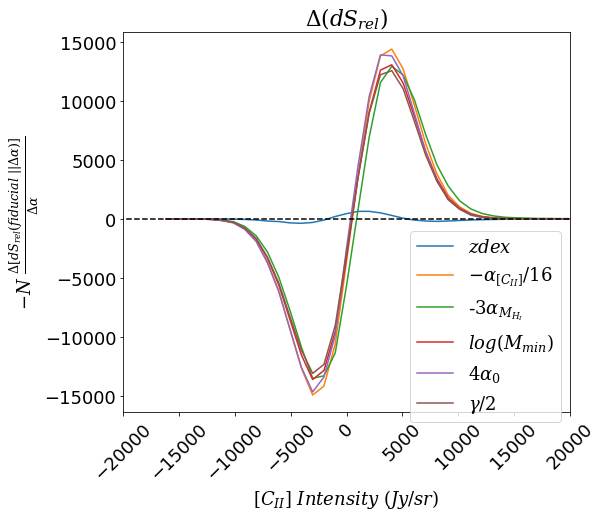

In [23]:
plt.plot(lin_center, -avg_zdex04_for*(np.log(avg_zdex05_for/avg_zdex04_for) - np.log(avg_zdex03_for/avg_zdex04_for))/0.2, label = r'$zdex$')
plt.plot(lin_center, (1/16)*avg_a24_for*(np.log(avg_a28_for/avg_a24_for) - np.log(avg_a20_for/avg_a24_for))/(0.008), label = r'$-\alpha_{[C_{II}]}/16$')
plt.plot(lin_center, 3*avg_mhi74_for*(np.log(avg_mhi80_for/avg_mhi74_for) - np.log(avg_mhi68_for/avg_mhi74_for))/0.12, label = r'-$3\alpha_{M_{H_I}}$')
plt.plot(lin_center, -avg_min10_for*(np.log(avg_min01_for/avg_min10_for) - np.log(avg_min99_for/avg_min10_for))/((10.1) - 9.9), label = r'$log(M_{min})$')
plt.plot(lin_center, -4*avg_a014_for*(np.log(avg_a015_for/avg_a014_for) - np.log(avg_a013_for/avg_a014_for))/0.2, label = r'$4\alpha_0$')
plt.plot(lin_center, -0.5*avg_g31_for*(np.log(avg_g35_for/avg_g31_for) - np.log(avg_g27_for/avg_g31_for))/0.08, label = r'$\gamma/2$')


plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$-N\ \frac{\Delta [dS_{rel}(fiducial\ \vert \vert \Delta \alpha)]}{\Delta \alpha}$')
plt.title(r'$\Delta(dS_{rel})$')
plt.xlim([-20000, 20000])
plt.xticks(rotation = 45)
plt.hlines(y = 0, xmin = lin_center[0], xmax = lin_center[-1], linestyle = '--', color = 'k')
plt.legend(bbox_to_anchor = (1, 0.5))

#plt.savefig('paper_figs/dsrel/drel_sig_v2.png', bbox_inches = 'tight')

1e6h: